<h1 style="text-align:center;font-size:28px;"> Deep learning methods for continous estimation of valence and arousal
            <br>(MuSe-Stress)</h1>

#### Course: 392231 Project: Affective Signals (Pj)
**Guided by Prof'in Hanna Drimalla and Herr Matthias Norden**
<br>
**Project by Harsha Manjunath**

### Introduction
**Multimodal Sentiment Analysis (MuSe) 2021** is a challenge which introduced estimation of emotion and sentiment through various sub-tasks by developing their own database. Here along with audio-visual and language parameters, biological signal modalities are also considered in assessing the physiological emotion and emotion-based stress recognition. 

**MuSe-Stress** is one among the four sub-challenges which focus on continuous emotion (valence and arousal) prediction. For the same purpose a new database *Ulm-TSST database* is created where data is extracted from the user under stressful conditions.
In this present project, different deep learning methods have been implemented along with the provided baseline approach.
This sub-challenge being a regression task, architectures such as GRU and CNN are implemented to compare the baseline LSTM performance. Data exploration and feature engineering techniques are applied on the individual feature sets to consider the best features for stress prediction. 

*Arousal* (or intensity) is the level of autonomic activation that an event creates, and ranges from calm (or low) to excited (or high). *Valence*, on the other hand, is the level of pleasantness that an event generates and is defined along a continuum from negative to positive[[2]](https://watermark.silverchair.com/nsx059.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAuIwggLeBgkqhkiG9w0BBwagggLPMIICywIBADCCAsQGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMjTdNzQ69co3VWpjHAgEQgIIClYKcVWUNREBzhrLegHw7jmJO7tCnqCMlIvLoVDu1S8lf8dOCl_mUXGxqtJOx8UZ_ofc9Hdd52h4BRRWnlCVzgjmEvbJAmU7y0h9vl2W6RBtmZ89mURBZYE3dRfzt3DnM4gA_wueFiW6fVWPNIWBppwo9cxe6Mj4_CUM-GcAYJJoP6_rk6_Ss_v2D05rCJw1xzGSTDrR8FAV3cXO1gQCfU19kT5sDOfVkh6OUktme27inm7gkfE5La11c5P_tMooCgMPsoYYYPB3osrjOcWUO_twhPM7g6ucSB9K0hKXcZgoNrZ1sE9o4HZ0kdr82yx5dDeUuycnk3VcSf82PcjxNwYCGQlDZrn8Vgh70iZUtntsh_rv9QDwZTHli3nqL3dfS40oWPdEBbtBBzISchVOPvkcQz91RMCCjPZ7dZKCG7Zd8SywjxmLbRQiOYTAUJDUALcRSeC5JltPfgEQACvPCjo5RcMKh8VdZIC1NrZ2ev7iYnKwWabbKW38X9R_wr9xiJDMRmSQmgJQEku67rsW_8VY0xQ1GZ9CR4k1FXGIeKGjbbH_9ARXgGTtnmQRi5Q-r1xaRRiduiQsq0f1gbhiG2aHe2gz3kcGvQM4WF4d_08wH3akFJgrCHJykPxYhruDQQ5LQWNF7_wgHX4k0WWQAdKSLsE0vFdsZF7QsFGB0e3Zq6mCyQAK2guFJoCdp7cyKDPlhrYqzZJ7uCyFJcAuneXNHHVi1VeZIgnMusTj2zF2HKtEEbMhAGbTMJ8d80VA3WotgjRHmqO5GUe-KKkVp2AZOIm1U_iA41FnHR6qOS-mn8CjfpKZ1-13oVFwxLgHbm52g9xbKtc0JD6r7OSupXu-bVrU1bsyUECk5JSI3XSOOfw2m4tA). These can be represented on a two-dimensional space as shown in the below image.


<img src="https://www.researchgate.net/profile/Lung-Hao-Lee-2/publication/304124018/figure/fig1/AS:374864755085312@1466386130906/Two-dimensional-valence-arousal-space.png" alt="Figure 1. Two-dimensional valence-arousal space" class="bg-primary mb-1" width="500px">
<figcaption style="text-align:center;">Figure 1. Two-dimensional valence-arousal space</figcaption>

[source](https://www.researchgate.net/profile/Lung-Hao-Lee-2/publication/304124018/figure/fig1/AS:374864755085312@1466386130906/Two-dimensional-valence-arousal-space.png)

In [ ]:
# import necessary libraries
import subprocess
import os
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np
import seaborn as sns
import glob
import cv2
import tensorflow

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from scipy import stats
from scipy.stats import norm
from PIL import ImageFile, Image
from matplotlib import image,pyplot
from tensorflow.keras import Sequential
from PIL import ImageFile, Image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import save_img
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization, TimeDistributed, SpatialDropout1D

### Ulm-TSST database 
Ulm-Trier Social Stress dataset (Ulm-TSST), recored videos of German-speaking individuals in a stress-induced
free speech task, following the TSST protocol. 
Initially, Ulm-TSST consists of 110 individuals (10 hours), richly annotated by self-reported, and
continuous dimensional ratings of emotion (valence and arousal).[[1]](https://arxiv.org/pdf/2104.07123.pdf)
Taking data partition into account, only 69 participants data(49 of them female) who were recorded under the same experimental conditions are focused on. It consists of 5:47:27 hr of total duration after preprocessing the original raw video.

The  processesed data is split into training, test and development(Total of 41,14,14 participants respectively). The index of the participant split is provided in the partition file[[1]](https://arxiv.org/pdf/2104.07123.pdf). 

In addition to audio, video, textual features, the Ulm-TSST includes four biological signals captured at a sampling rate of 1kHz; EDA, Electrocardiogram (ECG), Respiration (RESP), and  Beats per minute (BPM).

In [ ]:
# training,test,devel data index extraction from partition file
partition  = pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/metadata/partition.csv")
partition_train_index=partition[(partition["Proposal"]=="train")]["Id"].to_numpy()
partition_devel_index=partition[(partition["Proposal"]=="devel")]["Id"].to_numpy()
partition_test_index=partition[(partition["Proposal"]=="test")]["Id"].to_numpy()
partition_index = partition[(partition["Proposal"]=="train") | (partition["Proposal"]=="devel")|(partition["Proposal"]=="test")]["Id"].to_numpy()

### Baseline Features and model
To ease the task for the participants, several features are extracted from the established open libraries for voice, face and text. In respect to the annotation sampling rate, the features are extracted at a step size of 0.5 s for the Ulm-TSST dataset.
In the below proposed approaches,only those feature sets which have showed better association with valence and arousal(VA) are considered. For this purpose, Feature sets like egemaps and vggface are selected for accoustic and vision respectively. Out of the three provided psychological features, BPM has shown better correlation with VA than the ECG and resp. The analysis for the same is shown below. 

**Accoustic:** OpenSMILE, DeepSpectrum and VGGish are the most common tools for the extraction of acoustic emotional feature representations. They  also have provided great result in most of the speech emotion recognition challenges. The prevalent open-source openSMILE toolkit is used to extract the extended Geneva Minimalistic Acoustic Parameter Set (eGeMAPS) which generates a total of 88 acoustic parameters for automatic voice analysis tasks[[1]](https://arxiv.org/pdf/2104.07123.pdf).

**Vision:** The MTCNN is used to distinguish facial expressions captured in the videos, which is pretrained on the WIDER FACE and CelebA data sets. later these are used as inputs for VGGface and OpenFace. 
VGGface uses deep CNN named as VGG16 for extracting common facial features of images obtained from the MTCNN. It comprises of 512 facial landmarks for each of the image. 
Out of the many features obtained from the OpenFace, only the intensity of the 17 Facial Action Units are provided as other features are of less importance[[1]](https://arxiv.org/pdf/2104.07123.pdf).

Also three psychological signals ECG, RESP and BPM which are extracted during the experiment are provided. 

**Baseline LSTM:** When it comes to the baseline model, Long Short-Term Memory (LSTM)-RNN based architecture is provided. The reason for using LSTM is to address the sequential nature of the input features. Looking into the architecture, input feature sequences are fed into uni- and bi-directional LSTM-RNNs. The hidden state dimensionality of the architecture is ℎ = 64 to encode the feature vector sequences. For this 4 layered LSTM-RNN, learning rate of {0.0001, 0.0002, 0.0005, 0.001} is tried and lr of 0.002 is used for baseline. Output from the final hidden layer is encoded by a feed-forward layer, which further outputs one-dimensional prediction sequence of logits for each time step for this regression analysis[[1]](https://arxiv.org/pdf/2104.07123.pdf).

Windowing method is used to segment the input features and labels during training process. For this baseline approach, a window size of 300 steps (150 s) and a hop size of 50 steps (25 s) is being used[[1]](https://arxiv.org/pdf/2104.07123.pdf). 


### Baseline initial setup
To setup the initial baseline model, install the packages given in the *environment.yml* file. Later the baseline code is cloned and tested using the command given in https://github.com/Harsha-madyastha/MuSe2021.<br>
The environment created and used for the project is *muse2021*. 
It can be activated with the command
``` bash
$ conda activate muse2021
```
The dataset and prediction paths are adjusted in *config.py* according to the requirement.

``` bash
$ python main.py --task stress --emo_dim arousal --feature_set egemaps --d_rnn 64 --rnn_n_layers 4 --rnn_bi --lr 0.002 --epochs 100 --batch_size 1024 --n_seeds 10 --win_len 300 --hop_len 50 --use_gpu --cache --save --save_path preds --normalize --norm_opts y
```

After checking for different learning rate(0.0002,0.001) and hidden layers(2,3,4) values, the ones provided in the baseline command gave the best results.  
<br>

After getting the prediction from each of the modality they are stored and *late fushion* technique is used to combine the features for better results. It has shown great performance change when the features are fused together. A combination of audio+video(egemaps+vggface) and audio+video+psychological(egemaps+vggface+BPM) were tried to check the performance for best valence arousal prediction scenario.

```bash
$ python late_fusion.py --task stress --emo_dim valence --preds_path preds --d_rnn 32 --rnn_n_layers 2 --epochs 20 --batch_size 64 --lr 0.001 --n_seeds 5 --win_len 200 --hop_len 100 --use_gpu --predict
```
Here the output of the individual modalities serves as input for the 2 layered rnn network which consists of 32 hidden states.
The predictions of individual modalities are stacked together and provided as input to the model.

## Different approaches
To compare the performance of the baseline model, different methods were employed. 
  * The dataset being large and to avoid the features which are not associated  with VA, correlation between them was checked. Through this method, a comparable features are selected based on their compatibility with VA and trained on baseline model.
  * CNN are good in capturing insights from the images and is also being used in many facial recognition challenges,hence the intuation to use this method for the challenge
  * Another well known architecture for time sequence prediction is GRU, it is trained on the same parameters as the baseline LSTM model. 

### Data Exploration 
Selection and filtering of features plays an important role in any machine learning modelling. Especially when the data is large and extracting multi-modal features out of it at proper sampling rate is crucial. For any kind of regression task, choosing proper features from the features set makes the model exclusive. To further understand the variables and their relation with the VA, a correlation matrix consisting of all the training data is constructed. Heat maps is also plotted to understand the correlation easily.

From the baseline results, it is evident that out of many feature sets available egemaps and VGGFace has shown good corelation with the target values. So considering only those feature sets, corresponding correation matrix is checked to filter those features which are above a definite positive value. Initially egemaps and VGGFace feature sets accounts for 88, 512 features respectively.
Same procedure is carried on to check which psychological features has better association with the target variable. 

In [ ]:
# creating a dataframe with ege data from the training partition set to find the correlation between the features, arousal and valence value
ege=pd.DataFrame()
for i in partition_train_index:
    ege_temp=pd.DataFrame()
    arousal = pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/label_segments/arousal/{i}.csv")
    valence = pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/label_segments/valence/{i}.csv")
    ege_original=pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/feature_segments/egemaps/{i}.csv")
    ege_temp=ege_temp.append(ege_original)
    ege_temp['a_value']=arousal['value']
    ege_temp['v_value']=valence['value']
    ege=ege.append(ege_temp)

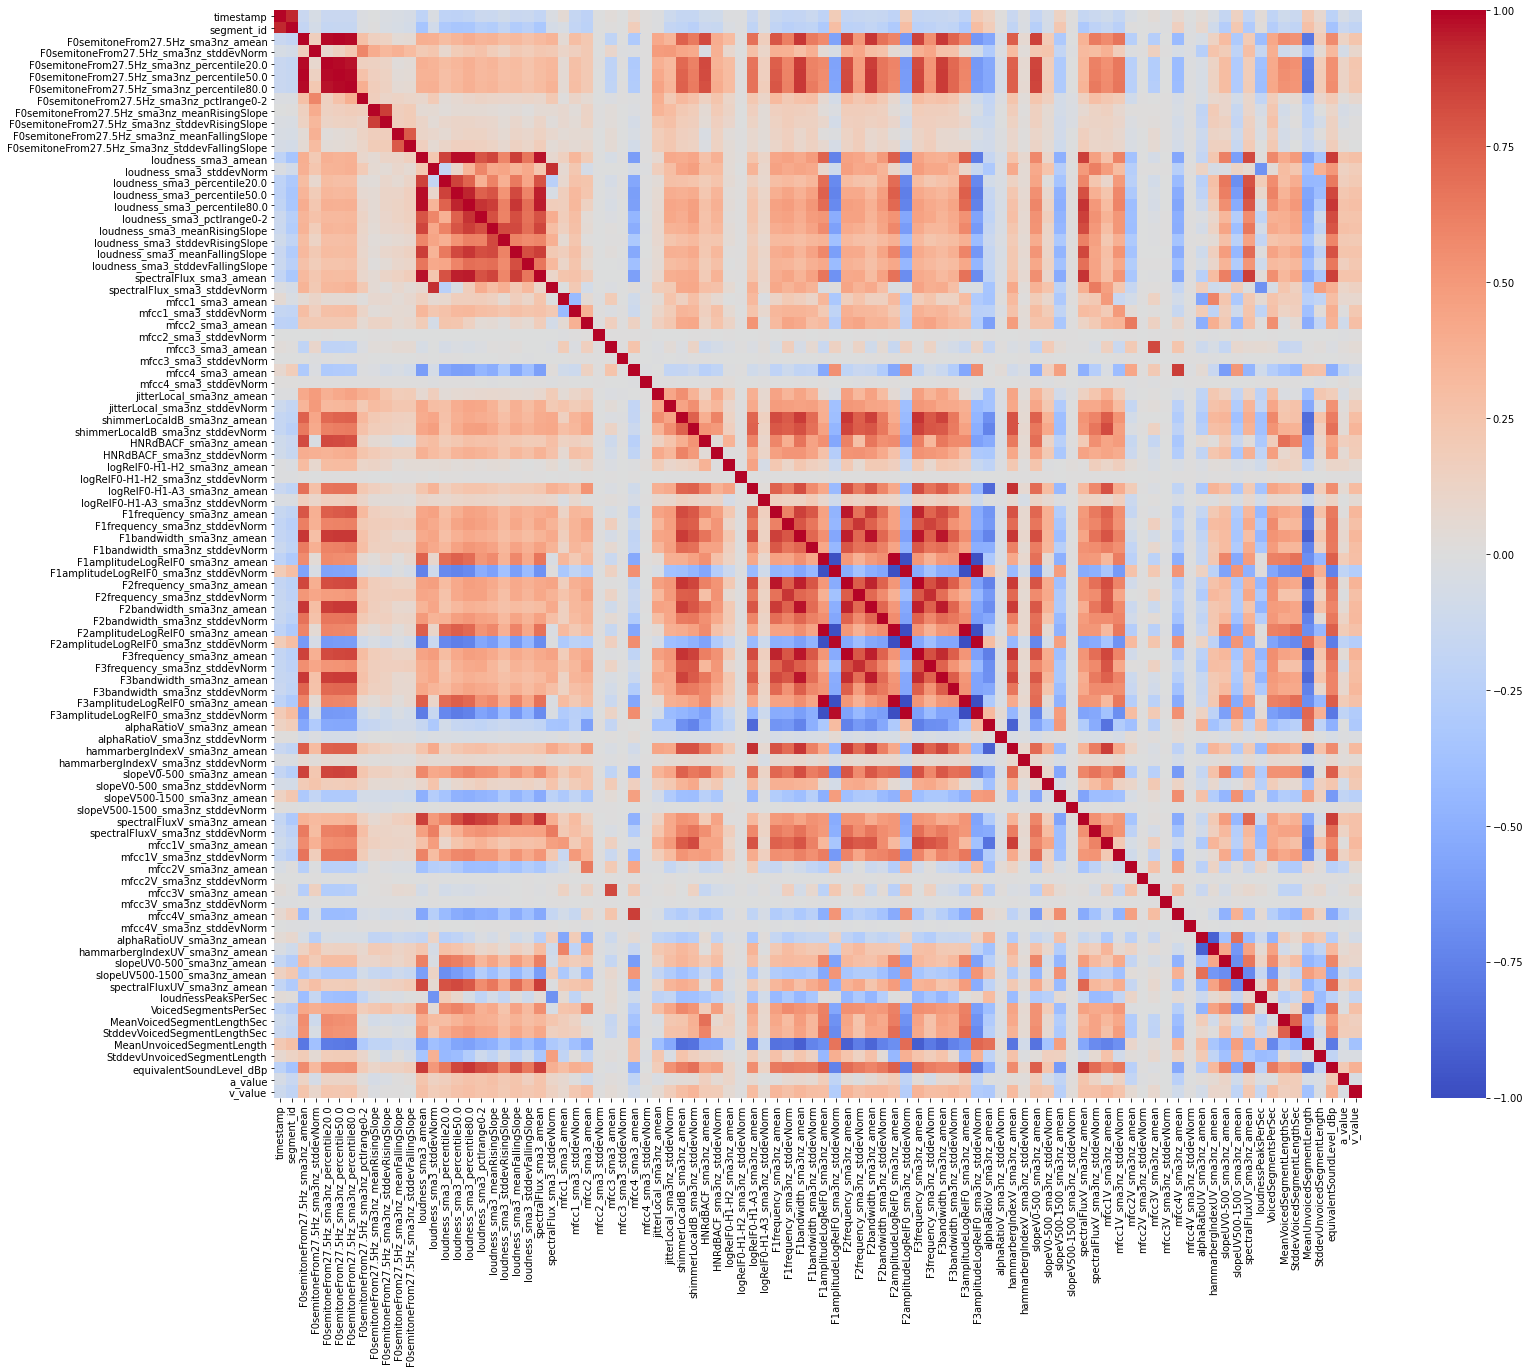

In [10]:
# Finding the correlation from the above data frame and plotting heatmap to check the dependency features
corr_matrix = ege.corr()
# fields = ['timestamp','segment_id']
# # drop rows
# corr_matrix.drop(fields, inplace=True)
plt.subplots(figsize=(25,20))
ax = sns.heatmap(corr_matrix, square=True, vmin = -1, vmax = 1, center = 0,cmap = 'coolwarm')
plt.show()

In [19]:
features_a = corr_matrix[corr_matrix['a_value']>0.18]
features_v = corr_matrix[corr_matrix['v_value']>0.28]
x=list(features_a.iloc[:,0].index)
y=list(features_v.iloc[:,0].index)
x=['timestamp','segment_id']+x[:-2]
y=['timestamp','segment_id']+y[:-2]

In [21]:
#the features used for arousal are  
features_a.index

Index(['loudness_sma3_amean', 'loudness_sma3_percentile50.0',
       'loudness_sma3_percentile80.0', 'loudness_sma3_pctlrange0-2',
       'loudness_sma3_meanRisingSlope', 'loudness_sma3_stddevRisingSlope',
       'loudness_sma3_meanFallingSlope', 'spectralFlux_sma3_amean',
       'F1amplitudeLogRelF0_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_amean',
       'F3amplitudeLogRelF0_sma3nz_amean', 'slopeV0-500_sma3nz_amean',
       'spectralFluxV_sma3nz_amean', 'MeanVoicedSegmentLengthSec',
       'StddevVoicedSegmentLengthSec', 'equivalentSoundLevel_dBp', 'a_value'],
      dtype='object')

In [22]:
#the features used for valence are  
features_v.index

Index(['loudness_sma3_percentile80.0', 'mfcc2_sma3_amean',
       'shimmerLocaldB_sma3nz_amean', 'shimmerLocaldB_sma3nz_stddevNorm',
       'logRelF0-H1-A3_sma3nz_amean', 'F1frequency_sma3nz_amean',
       'F1bandwidth_sma3nz_amean', 'F1bandwidth_sma3nz_stddevNorm',
       'F1amplitudeLogRelF0_sma3nz_amean', 'F2frequency_sma3nz_amean',
       'F2bandwidth_sma3nz_amean', 'F2bandwidth_sma3nz_stddevNorm',
       'F3frequency_sma3nz_amean', 'F3frequency_sma3nz_stddevNorm',
       'F3bandwidth_sma3nz_amean', 'F3bandwidth_sma3nz_stddevNorm',
       'hammarbergIndexV_sma3nz_amean', 'mfcc1V_sma3nz_amean',
       'equivalentSoundLevel_dBp', 'v_value'],
      dtype='object')

In [ ]:
#Creating new dataframe with only those filtered features 
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

for i in partition_index:
    EGE = pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/feature_segments/egemaps/{i}.csv")
    Extracted_ege_a = select_columns(EGE, x)
    Extracted_ege_v= select_columns(EGE, y)
    Extracted_ege_a.to_csv(f"./Ege_extracted_a/{i}.csv",index=False)
    Extracted_ege_v.to_csv(f"./Ege_extracted_v/{i}.csv",index=False)

In [ ]:
# It is seen that the 38,62,65 and 73rd file contain feature_columns from [1,512] so a shift is required.(other files:[0,511])
index_col = np.arange(0,512)
index_col_old = np.arange(1,513)
dict_rename = dict()
for i, j in enumerate(index_col_old):
    dict_rename[str(j)] = str(index_col[i])

In [ ]:
vggface=pd.DataFrame()
for i in partition_train_index:
    vgg_temp=pd.DataFrame()
    arousal = pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/label_segments/arousal/{i}.csv")
    valence = pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/label_segments/valence/{i}.csv")
    vgg_actual=pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/feature_segments/vggface/{i}.csv")
    try:
        vgg_actual['0'].empty 
        vgg_temp=vgg_temp.append(vgg_actual)
        vgg_temp['a_value']=arousal['value']
        vgg_temp['v_value']=valence['value']
        vggface = pd.concat([vggface,vgg_temp],ignore_index=True)
    except KeyError:
        vgg_actual.rename(columns=dict_rename,inplace=True)
        vgg_temp=vgg_temp.append(vgg_actual)
        vgg_temp['a_value']=arousal['value']
        vgg_temp['v_value']=valence['value']
        vggface = pd.concat([vggface,vgg_temp],ignore_index=True)

In [26]:
corr_matrix_vgg = vggface.corr()

In [ ]:
features_a = corr_matrix_vgg[corr_matrix_vgg['a_value']>0.2]
features_v = corr_matrix_vgg[corr_matrix_vgg['v_value']>0.2]
x=list(features_a.iloc[:,0].index)
y=list(features_v.iloc[:,0].index)
x=['timestamp','segment_id']+x[:-2]
y=['timestamp','segment_id']+y[:-2]

In [28]:
#the features used for arousal are  
features_a.index

Index(['23', '26', '33', '53', '60', '85', '103', '135', '149', '170', '197',
       '214', '235', '242', '269', '272', '278', '289', '297', '302', '350',
       '368', '378', '383', '398', '400', '429', '471', '481', '487', '511',
       'a_value'],
      dtype='object')

In [29]:
#the features used for valence are  
features_v.index

Index(['1', '10', '20', '36', '54', '64', '67', '69', '80', '97', '103', '104',
       '114', '147', '153', '160', '167', '171', '187', '194', '213', '216',
       '254', '264', '272', '291', '311', '329', '339', '341', '345', '348',
       '402', '428', '434', '439', '459', '463', '464', '498', 'v_value'],
      dtype='object')

In [ ]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

for i in partition_index:
    vgg = pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/feature_segments/vggface/{i}.csv")
    Extracted_vgg_a= select_columns(vgg, x)
    Extracted_vgg_v= select_columns(vgg, y)
    Extracted_vgg_a.to_csv(f"./Extracted_vgg_a/{i}.csv",index=False)
    Extracted_vgg_v.to_csv(f"./Extracted_vgg_v/{i}.csv",index=False)

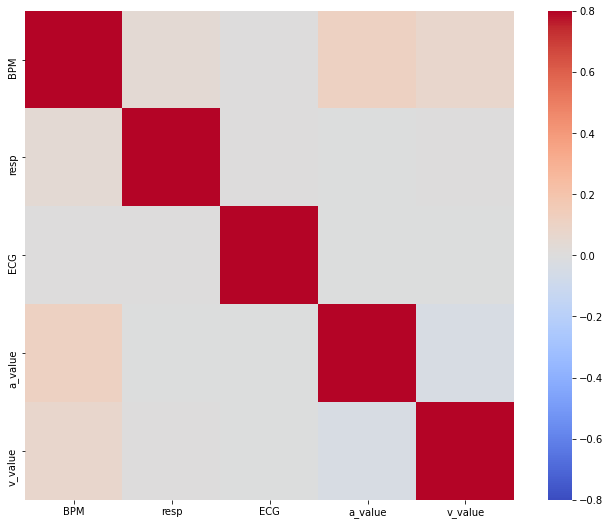

In [30]:
# creating a dataframe with 3 pyschological data from the training partition set to find the best correlation between the features, arousal and valence value
psychological_signal=pd.DataFrame()
for i in partition_train_index:
    psychological_signal_temp=pd.DataFrame()
    arousal = pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/label_segments/arousal/{i}.csv")
    valence = pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/label_segments/valence/{i}.csv")
    BPM_original=pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/feature_segments/BPM/{i}.csv")
    resp_original=pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/feature_segments/resp/{i}.csv")
    ECG_original=pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/feature_segments/ECG/{i}.csv")
    psychological_signal_temp=pd.concat([psychological_signal_temp,BPM_original['BPM'],resp_original['resp'],ECG_original['ECG']],axis = 1,ignore_index=True)
    psychological_signal_temp['a_value']=arousal['value']
    psychological_signal_temp['v_value']=valence['value']
    psychological_signal=psychological_signal.append(psychological_signal_temp)
psychological_signal.rename(columns={0:"BPM",1:"resp",2:"ECG"},inplace = True)
corr_matrix = psychological_signal.corr()
plt.subplots(figsize=(12,9))
ax = sns.heatmap(corr_matrix, square=True, vmin = -0.8, vmax = 0.8, center = 0,cmap = 'coolwarm')
plt.show()

### Estimating valence and arousal using CNN:
To compare the baseline RNN approach, a CNN model is trained from the provided images. Here the provided raw images are used as inputs to the sequential layer. Initially the total number of images and target values for each time stamp of a participant is checked, to overcome missing raw images. This helped to remove those participants data which had missing image frames for a particular target timestamp. Later the input raw images of a participant are sorted in  descending order, as the raw images are unsorted and to match the target time stamp.  
Same evaluation score is used to evaluate the model which is used for baseline LSTM(Concordance correlation coefficient).
The raw images extracted from the videos are also provided, an example of the same can be seen as shown below. 

(126, 105, 3)


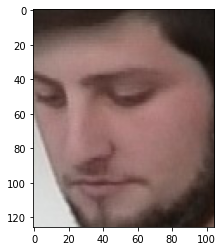

In [2]:
# load image as pixel array
data = image.imread('/vol/mbp_projects/datasets/muse2021/ulm-tsst/raw-data-ulm-tsst/data/raw/faces/1/0.jpg')
# shape of the pixel array
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [32]:
# image re-size
img_width, img_height = 148, 148
# Рgrayscale image 148x148
input_shape = (img_width, img_height, 1)

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# training,devel data index extraction from partition file
partition  = pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/metadata/partition.csv")
partition_train1_index=partition[(partition["Proposal"]=="train")]["Id"].to_numpy()
partition_devel1_index=partition[(partition["Proposal"]=="devel")]["Id"].to_numpy()

In [ ]:
#sorting the raw_images in an order to match target timestamp
filenames_train = {}
for i in partition_train1_index:
    filenames_train[i] = []
for i in partition_train1_index:
    for filename in sorted(glob.glob(f'/vol/mbp_projects/datasets/muse2021/ulm-tsst/raw-data-ulm-tsst/data/raw/faces/{i}/*.jpg')):
        filenames_train[i].append((int(filename.split("/")[-1].strip(".jpg"))))

In [ ]:
# training data 
# Converting image to grayscale and constructing single list of images by comparing with target size
X_1 = []
X_train= []
c = 0
arousal_train=pd.DataFrame()
valence_train=pd.DataFrame()
for i in partition_train1_index:
    for filename_1 in sorted(filenames_train[i]):
        filename = f'/vol/mbp_projects/datasets/muse2021/ulm-tsst/raw-data-ulm-tsst/data/raw/faces/{i}/{filename_1}.jpg'
        image = cv2.imread(filename)
        image = cv2.resize(image, (img_width, img_height))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        X_1.append(image)

    arousal = pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/label_segments/arousal/{i}.csv") 
    valence = pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/label_segments/valence/{i}.csv")

    if arousal["value"].shape[0] == len(X_1):
        arousal_train = arousal_train.append(arousal)
        valence_train=valence_train.append(valence)
        X_train.extend(X_1)
    X_1 = []  

In [ ]:
# Following the above procedure to build test data(devel_data)
filenames_test = {}
for i in partition_devel1_index:
    filenames_test[i] = []
for i in partition_devel1_index:
    for filename in sorted(glob.glob(f'/vol/mbp_projects/datasets/muse2021/ulm-tsst/raw-data-ulm-tsst/data/raw/faces/{i}/*.jpg')):
        filenames_test[i].append((int(filename.split("/")[-1].strip(".jpg"))))
        
X_2 = []
X_test = []
c = 0
arousal_test=pd.DataFrame()
valence_test=pd.DataFrame()
for i in partition_devel1_index:
    for filename_1 in sorted(filenames_test[i]):
        filename = f'/vol/mbp_projects/datasets/muse2021/ulm-tsst/raw-data-ulm-tsst/data/raw/faces/{i}/{filename_1}.jpg'
        image = cv2.imread(filename)
        image = cv2.resize(image, (img_width, img_height))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        X_2.append(image)

    arousal = pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/label_segments/arousal/{i}.csv") 
    valence = pd.read_csv(f"/vol/mbp_projects/datasets/muse2021/c3_muse_stress/label_segments/valence/{i}.csv")

    if arousal["value"].shape[0] == len(X_2):
        arousal_test = arousal_test.append(arousal)
        valence_test=valence_test.append(valence)
        X_test.extend(X_2)
#         print(arousal["value"].shape[0] == len(X_2))
#         print(arousal["value"].shape,valence["value"].shape, len(X_2),i)
#         print(len(X_test),arousal_train["value"].shape)
    X_2 = []  

In [ ]:
arousal_train = arousal_train["value"].to_numpy()
valence_train = valence_train["value"].to_numpy()
arousal_test = arousal_test["value"].to_numpy()
valence_test = valence_test["value"].to_numpy()

In [ ]:
# setting pixels values to range [0,1]
X_train = np.divide(X_train, 255.0)
X_test = np.divide(X_test, 255.0)

In [33]:
# common model for both valence and arousal
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

model.summary()

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 144, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 72, 72, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 68, 68, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)       

In [ ]:
# valence training
model_v = model
x_train_v = np.array(X_train)
y_train_v = valence_train
x_train_v = x_train_v.reshape(x_train_v.shape[0], img_width, img_height, 1)

model_v.fit(x_train_v, y_train_v, epochs=50, batch_size=64)

In [ ]:
# arousal training
model_a = model
x_train_a = np.array(X_train)
y_train_a = arousal_train
x_train_a = x_train_a.reshape(x_train_a.shape[0], img_width, img_height, 1)
# x_test_a = x_test_a.reshape(x_test_a.shape[0], img_width, img_height, 1)

model_a.fit(x_train_a, y_train_a, epochs=100, batch_size=128)

In [ ]:
# saving valence model to file
model_json_v = model_v.to_json()

json_file = open("affect_model_v.json", "w")
json_file.write(model_json_v)
json_file.close()

model_v.save_weights("affect_model_v.h5")

In [ ]:
# saving arousal model to file

model_json_a = model_a.to_json()

json_file = open("affect_model_a.json", "w")
json_file.write(model_json_a)
json_file.close()

model_a.save_weights("affect_model_a.h5")

In [ ]:
# Predicting VA for test data(devel) and evaluation  
import numpy as np
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing import image

json_file_v = open("affect_model_v.json", "r")
json_file_a = open("affect_model_a.json", "r")

loaded_model_json_v = json_file_v.read()
loaded_model_json_a = json_file_a.read()

json_file_v.close()
json_file_a.close()

loaded_model_v = model_from_json(loaded_model_json_v)
loaded_model_a = model_from_json(loaded_model_json_a)

loaded_model_v.load_weights("affect_model_v.h5")
loaded_model_a.load_weights("affect_model_a.h5")

loaded_model_v.compile(loss='mean_squared_error', optimizer='sgd')
loaded_model_a.compile(loss='mean_squared_error', optimizer='sgd')

x_test_np = np.array(X_test)
x_test_np = np.expand_dims(x_test_np, axis=-1)

prediction_v = loaded_model_v.predict(x_test_np)
prediction_a = loaded_model_a.predict(x_test_np)

In [ ]:
def calc_ccc(preds, labels):
    preds = np.row_stack(preds)[:, 0]
    labels = np.row_stack(labels)[:, 0]

    preds_mean, labels_mean = np.mean(preds), np.mean(labels)
    cov_mat = np.cov(preds, labels)
    covariance = cov_mat[0, 1]
    preds_var, labels_var = cov_mat[0, 0], cov_mat[1, 1]

    ccc = 2.0 * covariance / (preds_var + labels_var + (preds_mean - labels_mean) ** 2)
    return ccc
val_CCC=calc_ccc(prediction_v,valence_test)
arousal_CCC=calc_ccc(prediction_a,arousal_test)
Print("Valence CCC: ",val_CCC)
Print("Arousal CCC: ",arousal_CCC)

### GRU Approach:
Gated Recurrent Units is one of the highly used RNN for time series analysis. Being one of the newest advancement, has showed great results in many applications. Even though it has simple gating construction compared to LSTM,it has shown better results. Depending on the type of dataset, both the models vary in performance. But when it comes to training period, GRU's train faster and also, it performs better with lesser training data. 
To compare baseline LSTM and GRU model, same parameters have been selected and trained. So, the above command can be used for training  GRU as well with some variation to the model file. Change the branch to *gru*, to get predictions using the GRU model.

### Results:
For evaluation, Concordance correlation coefficient(CCC) score is used. It is basically a measure to compare relation with two variables(prediction,true_preds). The mathematical formula to compute CCC for length N data(x,y) is given below[[3]](https://en.wikipedia.org/wiki/Concordance_correlation_coefficient#Definition),

$$\hat{\rho}_c = \frac{2 s_{xy}}{s_x^2 + s_y^2 + (\bar{x} - \bar{y})^2}$$

where the mean is computed as 
$$\bar{x} = \frac{1}{N} \sum_{n=1}^N x_n$$
and the variance 
$$s_x^2 = \frac{1}{N} \sum_{n=1}^N (x_n - \bar{x})^2$$
and the covariance 
$$s_{xy} = \frac{1}{N} \sum_{n=1}^N (x_n - \bar{x})(y_n - \bar{y}) $$

From the below result, it is evident that GRU has performed better on the present muse-stress data. Also it is noticiable that the proposed feature extraction method has produced results almost near to the model with all the feature included. For arousal, BPM trained on GRU alone has provided best results which is more than 20% as compared to the baseline LSTM. For valence, the combination of the 3 modalities trained on GRU has shown results greater than 3% above the baseline method. It is also evident that the addition of a psychological signal has improved the result in almost all the models. The task being sequential, CNN has failed to predict the VA values accurately.

| Emo Dim   | Arousal | | | |
| :---: | :---: | :---: | :---: | :---: |
|**Features** | Baseline.LSTM | GRU | Ex.LSTM | Ex.GRU |
| **EGEMAPS(A)** |
| **Vggface(V)**| 
| **BPM(p)**|
| **A+V**|
| **A+V+P**|

Ex.LSTM and Ex.GRU- models trained on LSTM and GRU with Extracted features


| Emo Dim   | Valence | | | |
| :------: |  :-----: | :---: | :---: | :---: |
| **Features** | Baseline.LSTM | GRU | Ex.LSTM | Ex.GRU |
| **EGEMAPS(A)** | 
| **Vggface(V)**| 
| **BPM(p)**|
| **A+V**| 
| **A+V+P**|



| Emo Dim   | Valence |arousal|
| :----: |  :----: | :---: |
| **CNN** | 


### Conclusion
Prediction of stressed states in day to day life is going to be very much necessary in the coming years. Especially estimating the level of stress makes it even easrier in treating the patients. The results has made it clear that the psychological signal predicts stress with higher accuracy than other combinations. 
The drawback from the feature selection method is that of selecting the threshold level. It is ambigious to select the number of features and threshold level for selecting the features. This report serves as starting point in estimating VA using this dataset. There are multiple things that can be improved such as, hyper-parameter optimization can be performed. Here, only the egemaps and VGGface feature sets have been analyzed and further analysis could be performed on the other feature sets.

### References
[1]  Stappen, L., Baird, A., Christ, L., Schumann, L., Sertolli, B., Messner, E.M., Cambria, E., Zhao, G. and Schuller, B.W., 2021. The MuSe 2021 Multimodal Sentiment Analysis Challenge: Sentiment, Emotion, Physiological-Emotion, and Stress. arXiv preprint arXiv:2104.07123.<br>
<br>
[2] Bestelmeyer, P.E., Kotz, S.A. and Belin, P., 2017. Effects of emotional valence and arousal on the voice perception network. Social cognitive and affective neuroscience, 12(8), pp.1351-1358.